<a href="https://colab.research.google.com/github/MarcelJonesRaymond/Neural-Network-and-Deep-Learning/blob/main/ANN_Application_Credit_Data(Mentoring_Session).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_digits

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [3]:
data=pd.read_csv('/content/credit_data.csv')

In [4]:
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
data.tail()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
1002,A12,48,A31,A40,12169,A65,A71,4,A93,A102,4,A124,36,A143,A153,1,A174,1,A192,A201,1
1003,A12,48,A32,A43,3060,A61,A74,4,A93,A101,4,A121,28,A143,A152,2,A173,1,A191,A201,2
1004,A11,30,A32,A45,11998,A61,A72,1,A91,A101,1,A124,34,A143,A152,1,A172,1,A192,A201,2
1005,A14,9,A32,A43,2697,A61,A73,1,A93,A101,2,A121,32,A143,A152,1,A173,2,A191,A201,1
1006,A14,18,A34,A43,2404,A61,A73,2,A92,A101,2,A123,26,A143,A152,2,A173,1,A191,A201,1


In [7]:
data.sample(5)

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_Account,Present_Employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_People_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,class
371,A14,18,A34,A43,6070,A61,A75,3,A93,A101,4,A123,33,A143,A152,2,A173,1,A192,A201,1
383,A13,12,A32,A40,1330,A61,A72,4,A93,A101,1,A121,26,A143,A152,1,A173,1,A191,A201,1
758,A12,7,A32,A43,2415,A61,A73,3,A93,A103,2,A121,34,A143,A152,1,A173,1,A191,A201,1
820,A14,12,A34,A43,618,A61,A75,4,A93,A101,4,A121,56,A143,A152,1,A173,1,A191,A201,1
943,A13,30,A33,A49,1908,A61,A75,4,A93,A101,4,A121,66,A143,A152,1,A174,1,A192,A201,2


In [8]:
data['class']=data['class']-1
data['class'].value_counts()

0    712
1    295
Name: class, dtype: int64

In [9]:
data.isna().sum()

Status_of_existing_checking_account                         0
Duration_in_month                                           0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_Account                                             0
Present_Employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors                                               0
Present_residence_since                                     0
Property                                                    0
Age_in_years                                                0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits_at_this_bank                     0
Job     

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status_of_existing_checking_account                       1007 non-null   object
 1   Duration_in_month                                         1007 non-null   int64 
 2   Credit_history                                            1007 non-null   object
 3   Purpose                                                   1007 non-null   object
 4   Credit_amount                                             1007 non-null   int64 
 5   Savings_Account                                           1007 non-null   object
 6   Present_Employment_since                                  1007 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1007 non-null   int64 
 8   Personal_status_and_sex     

In [12]:
obj_cols=data.select_dtypes(include='object').columns.tolist()
num_cols=data.select_dtypes(exclude='object').columns.tolist()

In [13]:
Data=data.copy(deep=True)

In [17]:
obj_Data=Data[obj_cols]
obj_Data=pd.get_dummies(obj_Data)

In [18]:
obj_Data.head()

,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_Account_A61,Savings_Account_A62,Savings_Account_A63,Savings_Account_A64,Savings_Account_A65,Present_Employment_since_A71,Present_Employment_since_A72,Present_Employment_since_A73,Present_Employment_since_A74,Present_Employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_A101,Other_debtors_A102,Other_debtors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_worker_A201,Foreign_worker_A202
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0


In [20]:
data_encoded=pd.concat([data[num_cols],obj_Data],axis=1)

In [21]:
data_encoded.head()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for,class,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_Account_A61,Savings_Account_A62,Savings_Account_A63,Savings_Account_A64,Savings_Account_A65,Present_Employment_since_A71,Present_Employment_since_A72,Present_Employment_since_A73,Present_Employment_since_A74,Present_Employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_A101,Other_debtors_A102,Other_debtors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_worker_A201,Foreign_worker_A202
0,6,1169,4,4,67,2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0


In [22]:
data_encoded.shape

(1007, 62)

In [25]:
y=data_encoded[['class']]

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(data_encoded.drop('class',axis=1),y,test_size=0.3,random_state=True)

In [ ]:
num_cols.remove('class')

In [39]:
scaler=StandardScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.fit_transform(X_test[num_cols])

In [40]:
X_train.head()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for,Status_of_existing_checking_account_A11,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A30,Credit_history_A31,Credit_history_A32,Credit_history_A33,Credit_history_A34,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Savings_Account_A61,Savings_Account_A62,Savings_Account_A63,Savings_Account_A64,Savings_Account_A65,Present_Employment_since_A71,Present_Employment_since_A72,Present_Employment_since_A73,Present_Employment_since_A74,Present_Employment_since_A75,Personal_status_and_sex_A91,Personal_status_and_sex_A92,Personal_status_and_sex_A93,Personal_status_and_sex_A94,Other_debtors_A101,Other_debtors_A102,Other_debtors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other_installment_plans_A141,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_worker_A201,Foreign_worker_A202
443,-0.725532,-0.906468,0.92196,1.102689,0.447643,-0.711038,2.443419,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
676,0.225631,0.641513,0.92196,1.102689,-0.239874,-0.711038,-0.409263,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0
808,2.603539,2.138839,-0.86855,-0.736868,0.275764,-0.711038,2.443419,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
811,-0.487741,-0.733888,0.92196,0.182910,0.963281,-0.711038,-0.409263,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0
744,-0.487741,-0.667511,-0.86855,1.102689,-0.669572,-0.711038,-0.409263,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0


In [41]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)

X train shape (704, 61)
X test shape (303, 61)


In [60]:
def modeling(lr,m):
  model=Sequential()
  model.add(Dense(300,activation='relu',input_shape=(61,)))
  model.add(Dense(300,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  sgd=SGD(lr)
  print(model.summary)
  model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=m)
  return model

In [75]:
models=modeling(0.01,['accuracy'])
history=models.fit(X_train,Y_train,batch_size=32,epochs=50,validation_split=0.2)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f74063c26d0>>
Epoch 1/50
18/18 [==============================] - 1s 17ms/step - loss: 0.6372 - accuracy: 0.7034 - val_loss: 0.6575 - val_accuracy: 0.6454
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6136 - accuracy: 0.6980 - val_loss: 0.6483 - val_accuracy: 0.6454
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.6008 - accuracy: 0.6980 - val_loss: 0.6421 - val_accuracy: 0.6454
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5918 - accuracy: 0.6980 - val_loss: 0.6362 - val_accuracy: 0.6454
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5836 - accuracy: 0.6980 - val_loss: 0.6291 - val_accuracy: 0.6454
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5767 - accuracy: 0.6980 - val_loss: 0.6225 - val_accuracy: 0.6454
Epoch 7/50
18/18 [==============================] - 0s 4ms/step -

In [76]:
y_hat=models.predict(X_test)

In [78]:
y_train_pred =  np.where(models.predict(X_train) > 0.5,1,0)
y_test_pred =  np.where(models.predict(X_test) > 0.5,1,0)

In [79]:
print(metrics.classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       484
           1       0.82      0.52      0.64       220

    accuracy                           0.81       704
   macro avg       0.81      0.73      0.76       704
weighted avg       0.81      0.81      0.80       704



In [80]:
print(metrics.classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       228
           1       0.57      0.43      0.49        75

    accuracy                           0.78       303
   macro avg       0.70      0.66      0.67       303
weighted avg       0.76      0.78      0.77       303



In [81]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.637228,0.703375,0.657467,0.645390
1,0.613601,0.698046,0.648302,0.645390
2,0.600791,0.698046,0.642084,0.645390
3,0.591833,0.698046,0.636155,0.645390
4,0.583623,0.698046,0.629063,0.645390
5,0.576749,0.698046,0.622519,0.645390
6,0.569875,0.698046,0.614201,0.645390
7,0.563312,0.698046,0.607987,0.645390
8,0.556885,0.698046,0.602183,0.645390
9,0.551140,0.698046,0.597048,0.645390


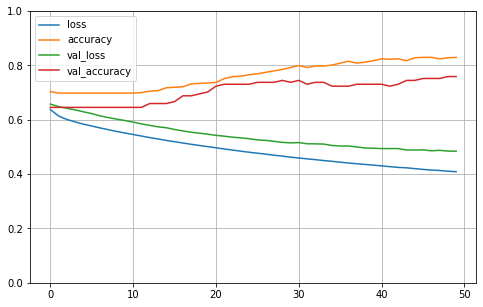

In [82]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [83]:
pip install keras-tuner

     |████████████████████████████████| 98 kB 3.2 MB/s 


In [84]:
def build_model(hp):          #hp means hyper parameters
    model1 = Sequential()
    
    # providing range for number of neurons in a hidden layer
    model1.add(Dense(units = hp.Int('num_of_neurons',
                                   min_value = 32,
                                   max_value = 512,
                                   step = 32), input_shape=(61,), activation='relu'))
    
    #output layer
    model1.add(Dense(1,activation='sigmoid'))
    
    #compiling the model
    model1.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',metrics=['accuracy'])
    
    return model1

In [86]:
from tensorflow import keras
from keras_tuner import RandomSearch
from keras.utils.np_utils import to_categorical 

In [87]:
tuner = RandomSearch(build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3,
    directory='tuner1',
    project_name ='Credit_Score')
tuner

In [88]:
y_train1 = to_categorical(Y_train, num_classes=2)
y_train1.shape
y_test1 = to_categorical(Y_test, num_classes=2)
y_test1.shape

(303, 2)

In [89]:
pd.DataFrame(y_test1).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [91]:
tuner.search(X_train,
             Y_train,
             epochs = 5,
             validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.7579757769902548

Best val_accuracy So Far: 0.8008800943692526
Total elapsed time: 00h 00m 24s
INFO:tensorflow:Oracle triggered exit
